#IMPORT Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.preprocessing import StandardScaler
import joblib

#Load_Data

In [2]:
df=pd.read_csv('breast_cancer.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

#Eda

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

##check_null

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

##check_duplicated

In [6]:
df.duplicated().sum()

0

In [7]:
df.duplicated().any()

False

##check_Balance

In [8]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [9]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

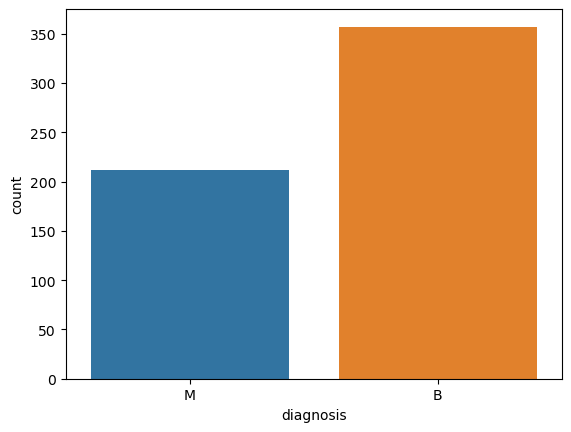

In [10]:
sns.countplot(data=df,x='diagnosis')

<Axes: xlabel='radius_mean', ylabel='diagnosis'>

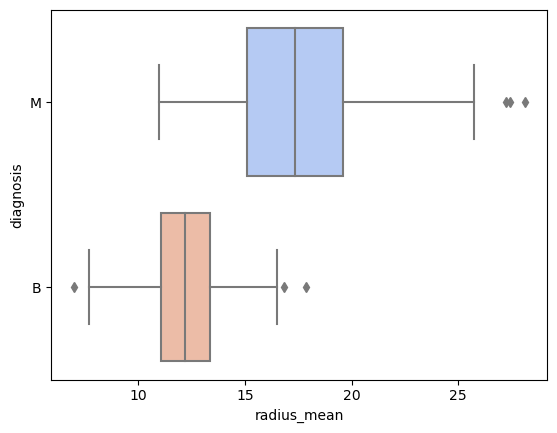

In [11]:
sns.boxplot(x="radius_mean", y="diagnosis",data=df, palette="coolwarm")

In [12]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#Encoding

In [13]:
df['diagnosis']=[1 if i=='M' else 0 for i in df['diagnosis']]

In [14]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

In [15]:
sns.boxplot(df['area_mean'])
(df['area_mean']>(782.700000*1.5)).sum()

57

<Axes: >

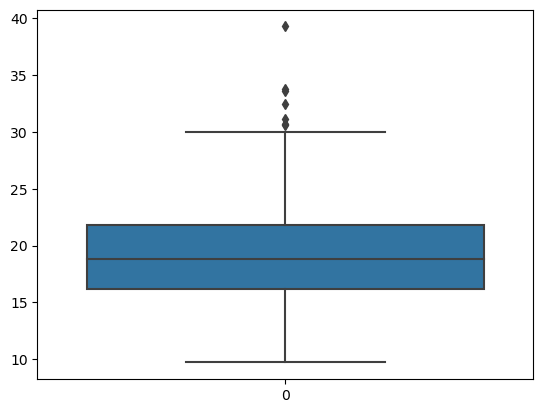

In [16]:
sns.boxplot(df['texture_mean'])

In [17]:
(df['texture_mean']>(21.800000*1.5)).sum()

3

In [18]:
sns.jointplot(x='texture_mean',y='area_mean',data=df,kind='scatter')

C:\Users\hazem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


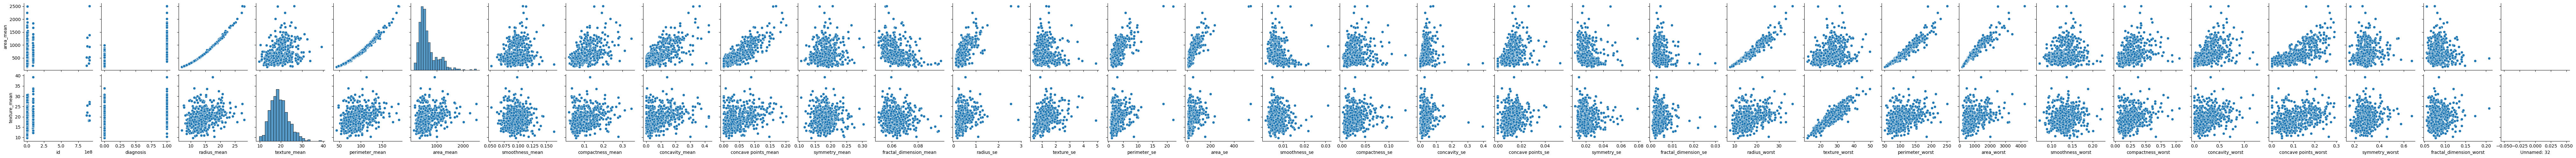

In [19]:
sns.pairplot(df,x_vars=df.columns,y_vars=['area_mean','texture_mean'])
plt.show()

#check_correlation

In [20]:
corr=df.corr()
corr

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                0.143048   0.567134     0.679090      0.275869   
texture_se              -0.007526  -0.008303    -0.097317      0.386358   
perimeter_se             0.137331   0.556141     0.674172      0.281673   
area_se                  0.177742   0.548236     0.735864      0.259845   
smoothness_se            0.096781  -0.067016    -0.222600      0.006614   
compactness_se           0.033961   0.292999     0.206000      0.191975   
concavity_se             0.055239   0.253730     0.194204      0.143293   
concave points_se        0.078768   0.408042     0.376169      0.163851   
symmetry_se             -0.017306  -0.006522    -0.104321      0.009127   
fractal_dimension_se     0.025725   0.077972    -0.042641      0.054458   
radius_worst             0.082405   0.776454     0.969539      0.352573   
texture_worst            0.064720   0.456903     0.297008      0.912045   
perimeter_worst          0.079986   0.782914     0.965137      0.358040   
area_worst               0.107187   0.733825     0.941082      0.343546   
smoothness_worst         0.010338   0.421465     0.119616      0.077503   
compactness_worst       -0.002968   0.590998     0.413463      0.277830   
concavity_worst          0.023203   0.659610     0.526911      0.301025   
concave points_worst     0.035174   0.793566     0.744214      0.295316   
symmetry_worst          -0.044224   0.416294     0.163953      0.105008   
fractal_dimension_worst -0.029866   0.323872     0.007066      0.119205   
Unnamed: 32                   NaN        NaN          NaN           NaN   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.073159   0.096893        -0.012968   
diagnosis                      0.742636   0.708984         0.358560   
radius_mean                    0.997855   0.987357         0.170581   
texture_mean                   0.329533   0.321086        -0.023389   
perimeter_mean                 1.000000   0.986507         0.207278   
area_mean                      0.986507   1.000000         0.177028   
smoothness_mean                0.207278   0.177028         1.000000   
compactness_mean               0.556936   0.498502         0.659123   
concavity_mean                 0.716136   0.685983         0.521984   
concave points_mean            0.850977   0.823269         0.553695   
symmetry_mean                  0.183027   0.151293         0.557775   
fractal_dimension_mean        -0.261477  -0.283110         0.584792   
radius_se                      0.691765   0.732562         0.301467   
texture_se                    -0.086761  -0.066280         0.068406   
perimeter_se                   0.693135   0.726628         0.296092   
area_se                        0.744983   0.800086         0.246552   
smoothness_se                 -0.202694  -0.166777         0.332375   
compactness_se                 0.250744   0.212583         0.318943   
concavity_se                   0.228082   0.207660         0.248396   
concave points_se              0.407217   0.372320         0

<Axes: >

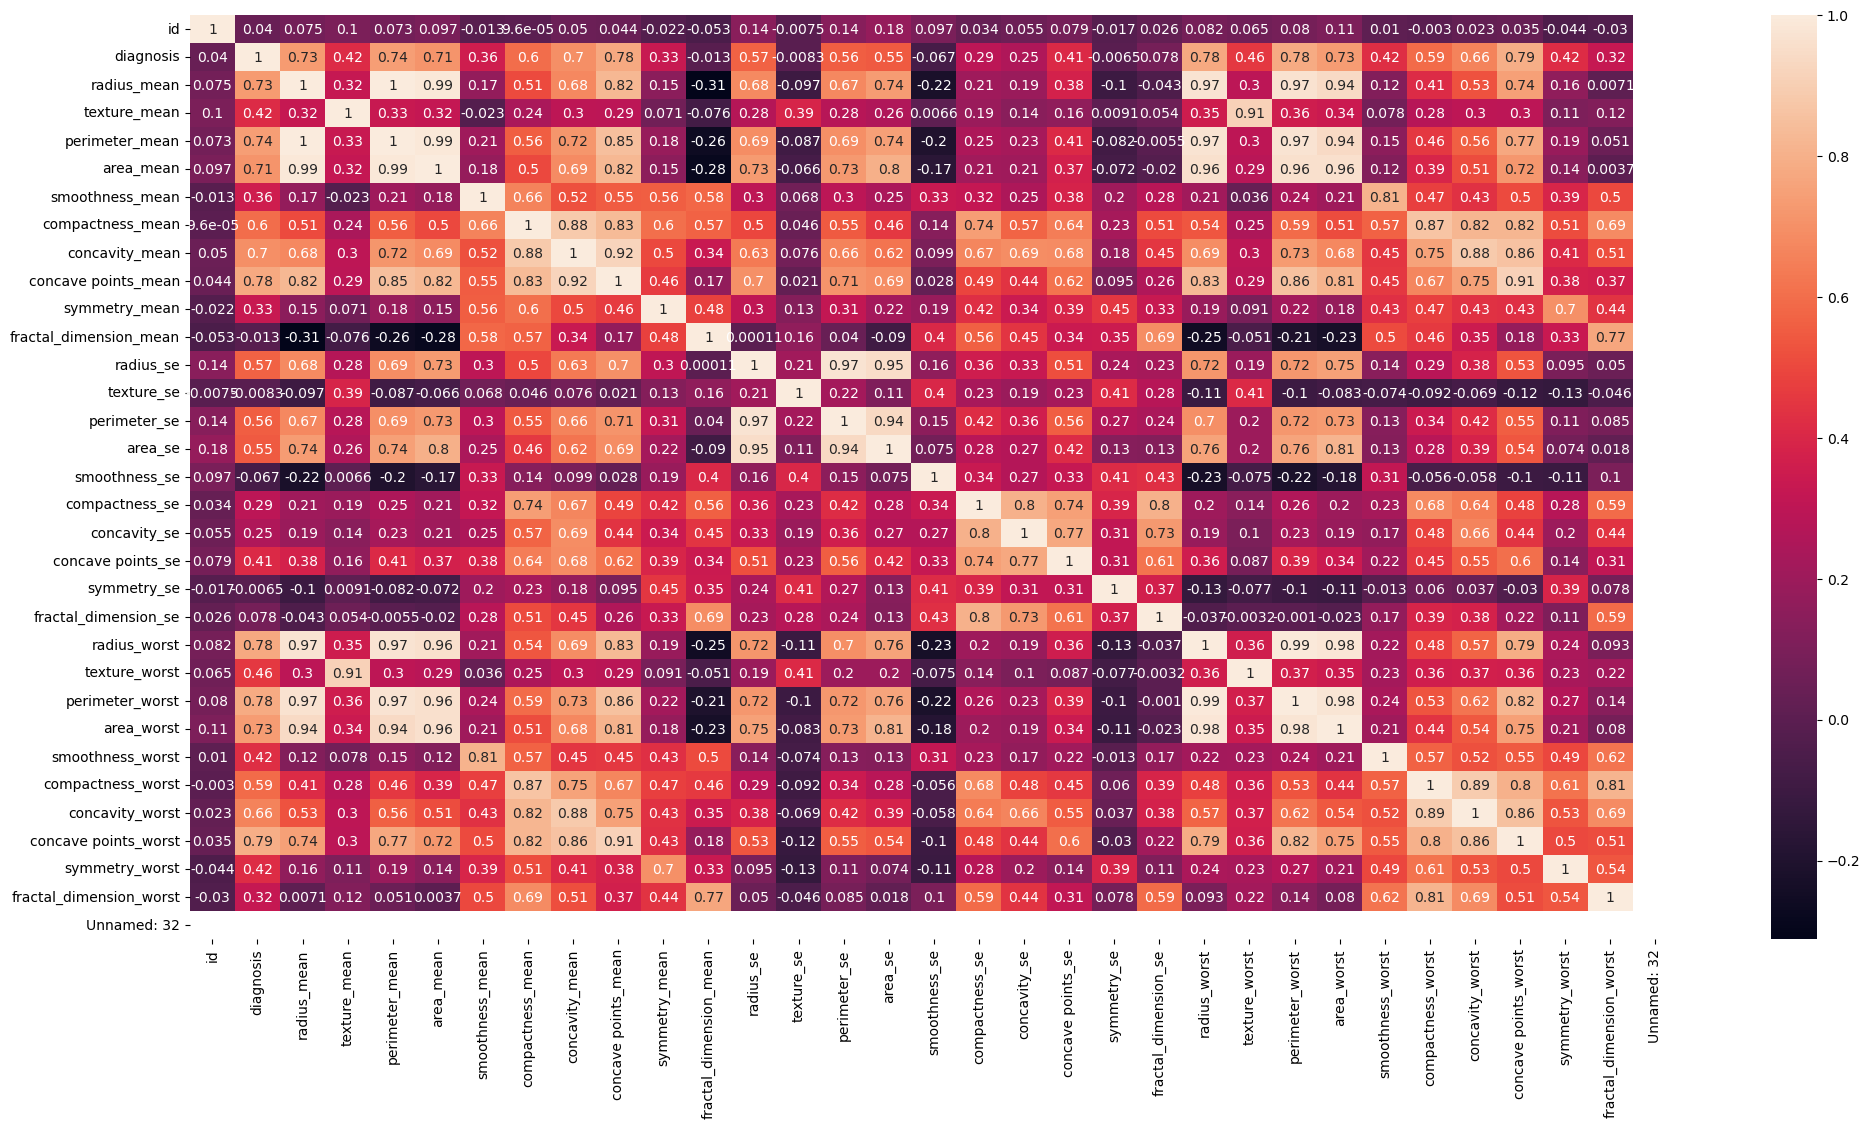

In [21]:
plt.figure(figsize=(24,12))
sns.heatmap(corr,annot=True)

In [22]:
corr.iloc[:,1].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

<Axes: >

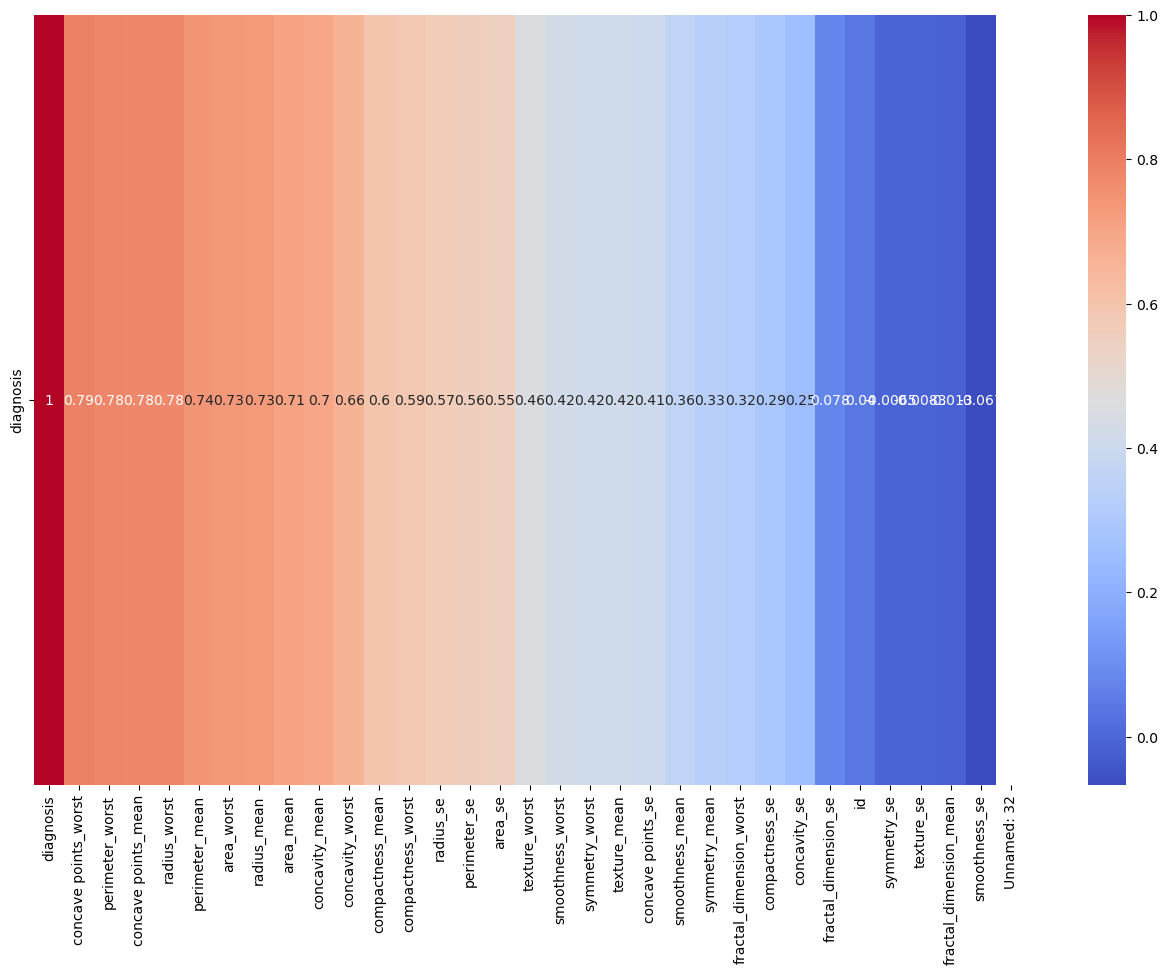

In [23]:
corr=df.corr()
frist_colm_corr=corr.iloc[:,1]

df_corr=pd.DataFrame({'diagnosis':frist_colm_corr})

sorted_corr=df_corr.sort_values(by='diagnosis', ascending=False)


plt.figure(figsize=(16,10))
sns.heatmap(sorted_corr.T, annot=True, cmap='coolwarm')

#Split_data

In [24]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [25]:
x=df.drop(['id','Unnamed: 32','diagnosis'],axis=1)
y=df['diagnosis']

#preprocessing

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3, random_state=42)

x_train,x_vald,y_train,y_vald=train_test_split(x_train,y_train,test_size=.3, random_state=42)

#scaling

In [27]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_vald=scaler.transform(x_vald)
x_test=scaler.transform(x_test)

In [28]:
x_vald

array([[ 1.73130776,  2.07069469,  1.66991453, ...,  0.65418674,
        -0.70159729,  0.03537053],
       [-0.03885636,  0.14708302, -0.03281968, ...,  1.05777771,
         0.5674769 ,  1.4326299 ],
       [ 1.36534733,  1.78649809,  1.34730777, ...,  1.12657162,
         0.70259397,  0.91070133],
       ...,
       [ 1.17287926,  0.68494269,  1.11125404, ...,  0.37289607,
         0.44775292, -0.41612912],
       [ 1.4656476 , -0.0220257 ,  1.47713732, ...,  1.29167702,
         0.20659462,  1.04212672],
       [ 0.54668032, -0.97091351,  0.48571167, ..., -0.00929235,
        -0.11837047, -0.79216921]])

#KNN

In [29]:
params={
    'n_neighbors':[3,5,7,9,11,13,15,17,19],
    'p':[1,2]
}

In [30]:
knn=KNeighborsClassifier()

In [31]:
grid=GridSearchCV(
    estimator=knn,
    param_grid=params,
    scoring='accuracy',
    cv=5
)

In [32]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2]},
             scoring='accuracy')

In [33]:
grid.best_params_

{'n_neighbors': 3, 'p': 1}

In [34]:
knn_model=grid.best_estimator_

#check_overfitting

In [35]:
y_train_pred=knn_model.predict(x_train)
y_vald_pred=knn_model.predict(x_vald)

In [36]:
accuracy_score(y_train_pred,y_train)

0.9892086330935251

In [37]:
accuracy_score(y_vald_pred,y_vald)

0.9333333333333333

#evaluation

In [38]:
y_pred=knn_model.predict(x_test)

In [39]:
accuracy=accuracy_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)

In [40]:
print('accuracy',accuracy)
print('recall',recall)
print('precision',precision)
print('f1',f1)

accuracy 0.9590643274853801
recall 0.9666666666666667
precision 0.9206349206349206
f1 0.943089430894309


In [41]:
joblib.dump(knn_model, 'project-knn.pkl')

['project-knn.pkl']

#Decision_Tree

In [42]:
params={
    'criterion':['entropy','gini'],
    'max_depth':[3,4,5,6,7]
}

In [43]:
dt=DecisionTreeClassifier()

In [44]:
grid=GridSearchCV(
    estimator=dt,
    param_grid=params,
    scoring='accuracy',
    cv=5
)

In [45]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7]},
             scoring='accuracy')

In [46]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [47]:
dt_model=grid.best_estimator_

#check_overfitting

In [48]:
y_train_pred=dt_model.predict(x_train)
y_vald_pred=dt_model.predict(x_vald)

In [49]:
accuracy_score(y_train_pred,y_train)

0.9856115107913669

In [50]:
accuracy_score(y_vald_pred,y_vald)

0.9083333333333333

#evaluation

In [51]:
y_pred=dt_model.predict(x_test)

In [52]:
accuracy=accuracy_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)

In [53]:
print('accuracy',accuracy)
print('recall',recall)
print('precision',precision)
print('f1',f1)

accuracy 0.9415204678362573
recall 0.9206349206349206
precision 0.9206349206349206
f1 0.9206349206349206


In [54]:
joblib.dump(dt_model, 'project-dt.pkl')

['project-dt.pkl']

#SVC

In [55]:
param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['linear', 'poly', 'rbf'], 
                'gamma': ['auto', 'scale']}

svc=SVC()

grid_search = GridSearchCV(svc, param_grid,scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train,y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Best score:  0.974935064935065


In [56]:
svm_model=SVC(C=1,gamma='auto',kernel='linear')
svm_model.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

#check_overfitting

In [57]:
y_pred_train=svm_model.predict(x_train)
y_pred_vald=svm_model.predict(x_vald)

In [58]:
accuracy_score_train=accuracy_score(y_train,y_pred_train)
accuracy_score_vald=accuracy_score(y_vald,y_pred_vald)

In [59]:
print(f'the accuracy of train={accuracy_score_train}')
print(f'the accuracy of validation={accuracy_score_vald}')

the accuracy of train=0.9928057553956835
the accuracy of validation=0.9583333333333334


#evaluation

In [60]:
y_pred=svm_model.predict(x_test)

In [61]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[107,   1],
       [  2,  61]], dtype=int64)

<Axes: >

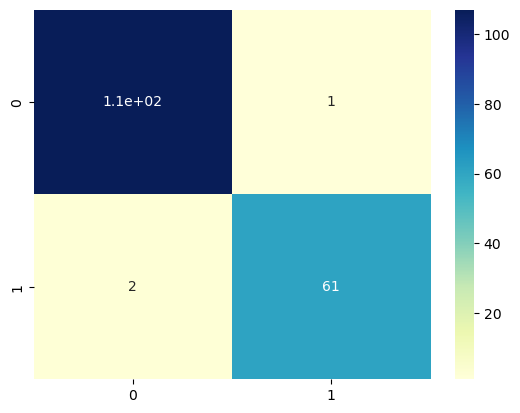

In [62]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu')

In [63]:
accuracy_score=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precesion=precision_score(y_test,y_pred)

In [64]:
print(f'{accuracy_score * 100} %')
print(f'{recall * 100} %')
print(f'{precesion * 100} %')

98.24561403508771 %
96.82539682539682 %
98.38709677419355 %


In [65]:
joblib.dump(svm_model, 'project-svm.pkl')

['project-svm.pkl']